When we see a data point drawn in a specific location, we tend to interpret it as a **precise representation** of the true data value. It is difficult to conceive that a data point could actually lie somewhere it hasn’t been drawn. Yet this scenario is ubiquitous in data visualization. 

**Uncertainty is everywhere!**

**Discussion:** What is the source of uncertatity? 

In statistics, our overarching goal is to learn something about the world by looking at a small portion of it. 
When we are visualzing an **estimate** of a **sample** population parameter. There are two types of estimates – **point estimates** and **confidence interval estimates**. 

A point estimate is a single number, while a confidence interval… naturally… is an interval. The two are closely related. In fact, the point estimate is located exactly in the middle of the confidence interval. 

However, confidence intervals provide much more information and are preferred when making inferences.

For example, the sample mean, is a point estimate of the **population mean** Moreover, the sample variance S squared is an estimate of the **population variance**. There may be many estimators for the same variable. However, estimators are like judges - we are always looking for the most efficient unbiased estimators.

As you can guess, the **point estimates** are not very reliable. Imagine visiting 5% of the restaurants in Bozeman and saying that the average meal is worth $22.50. You 
may be close, but chances are that the true value isn’t really 22.50 but somewhere around it. 

It’s much safer to say that the average meal in Bozeman is somewhere between 20 and 25 dolloars, isn’t it? In this way, you have created a **confidence interval around your point estimate** of 22.50! 

A confidence interval is a much more accurate representation of reality. However, there is still some uncertainty left which we measure in **levels of confidence**. 

So, getting back to our example, you may say that you are 95% confident that the population parameter lies between 20 and 25 dollar. **Keep in mind that you can never be 100% confident unless you go through the entire population!** 

So, with %95 cinfidence there is, of course, a 5% chance that the actual population parameter is outside of the 20 to 25 dollars range. We’ll observe that if the sample we have considered deviates significantly from the entire population. 

There is one more ingredient needed: the level of confidence. **Confidence level = 1 - $\alpha$** 

$\alpha$ is a value between 0 and 1. For example, if we want to be 95% confident that the parameter is inside the interval, $\alpha$ is 5%. If we want a higher confidence level of, say, 99%, $\alpha$ will be 1%. 

The formula for all confidence intervals is: 

**\[point estimates - reliability factor * standard error, point estimates + reliability factor  * standard error\]**

Standard Error is the variance standardized by sample size : **$\sqrt{\sigma^2/n}$**

What is the reliablity factor then?
The z of alpha comes from the  standard normal distribution table. Let’s say that we want to find the values for the 95% confidence interval. Alfa is 0.05, therefore, we are looking for z of alpha divided by two, or 0.025. In the table, this will match the value of 1-0.025, or 0.975. The corresponding z comes from the sum of the row and column table headers associated with this cell. In our case, the value is 1.9+0.06, or 1.96. A commonly used term for the z is critical value. So, we have found the critical value.


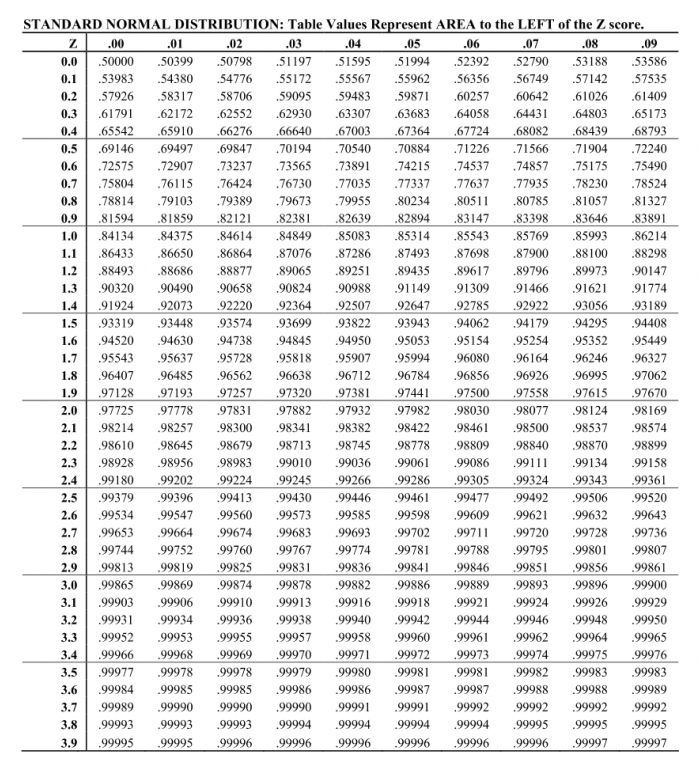

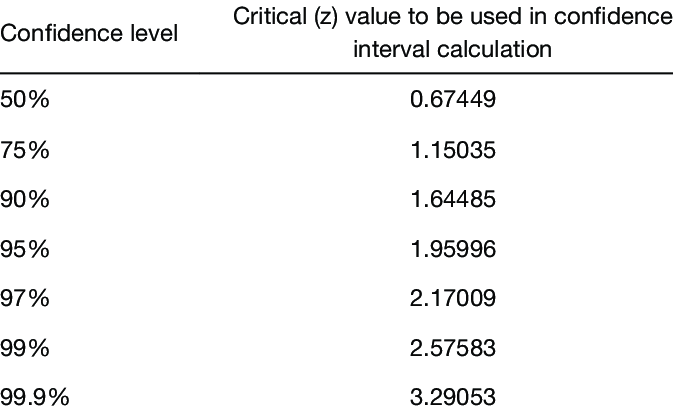

**Discussion:** Which one gives a wider CI (sample size of 100 or sample size of 1000)?

### In-class problem: 
Let’s say you want to become a sofware engineer and you are interested in the salary you are going to get. Imagine you have you got a sample of 30 software engieers. The sample mean is 120K and the standard deviation is $20K. Calculate the 95% interval of your future salary?

## Visualizing the Uncertainty of Point Estimates

whether and how we choose to represent this uncertainty can make a major difference in how accurately our audience perceives the meaning of the data.

We can visualize uncertainty with error bars. A problem with error bars is that It is easy for readers to be confused about what an error bar represents. All five error bars are derived from the variation in the sample, and they are all mathematically related, but they have different meanings. They are also visually quite distinct.

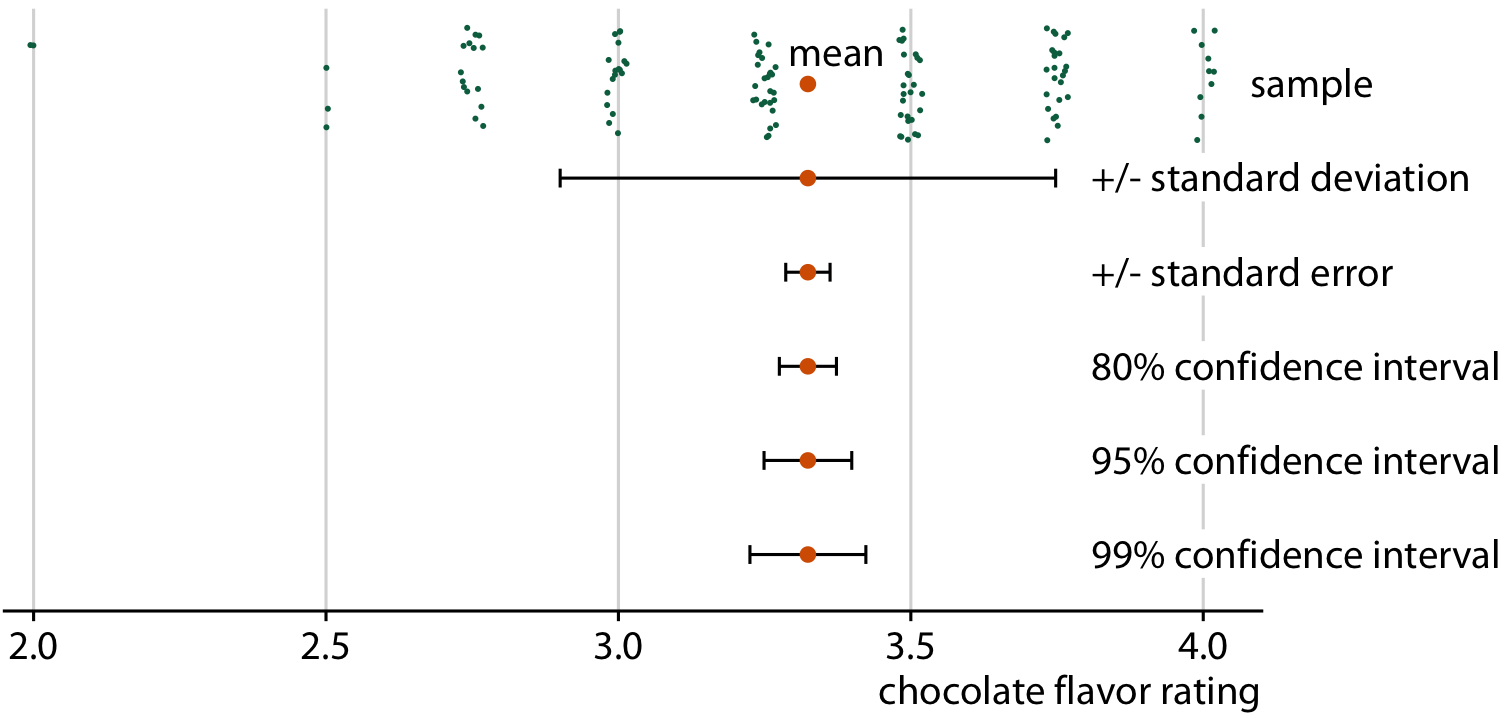!

We can see this effect when we compare ratings for chocolate bars from Canada to ones from Switzerland

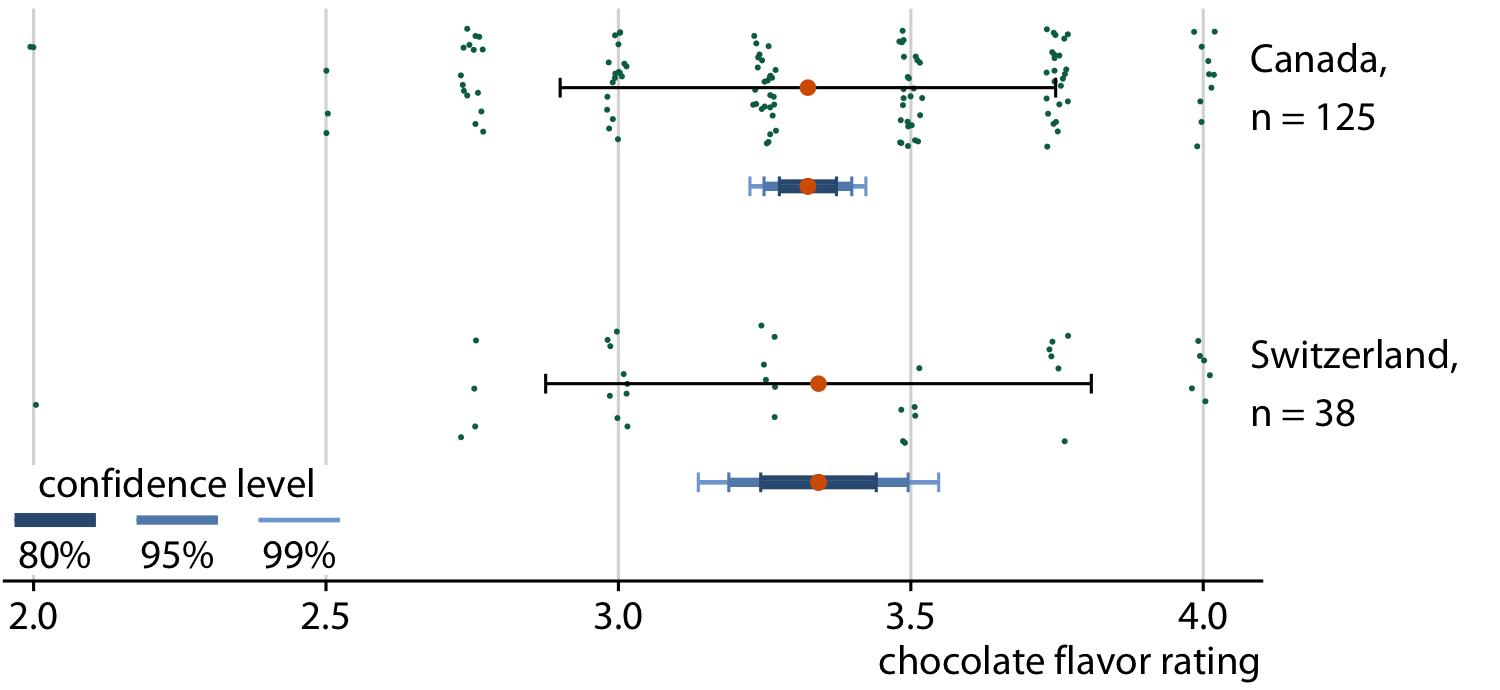!

The mean rating and sample standard deviation are comparable between Canadian and Swiss chocolate bars, but we have ratings for 125 Canadian bars and only 38 Swiss bars, and consequently the confidence intervals around the mean are much wider in the case of Swiss bars.



Three different confidence intervals are shown at the same time, using graded error bars. 

As there is no standard practice for error bars, they can be percieved very differently by the audience, like the error bars delineate the range of possible parameter estimates

**Discussion:** What is the advatange of error bars?

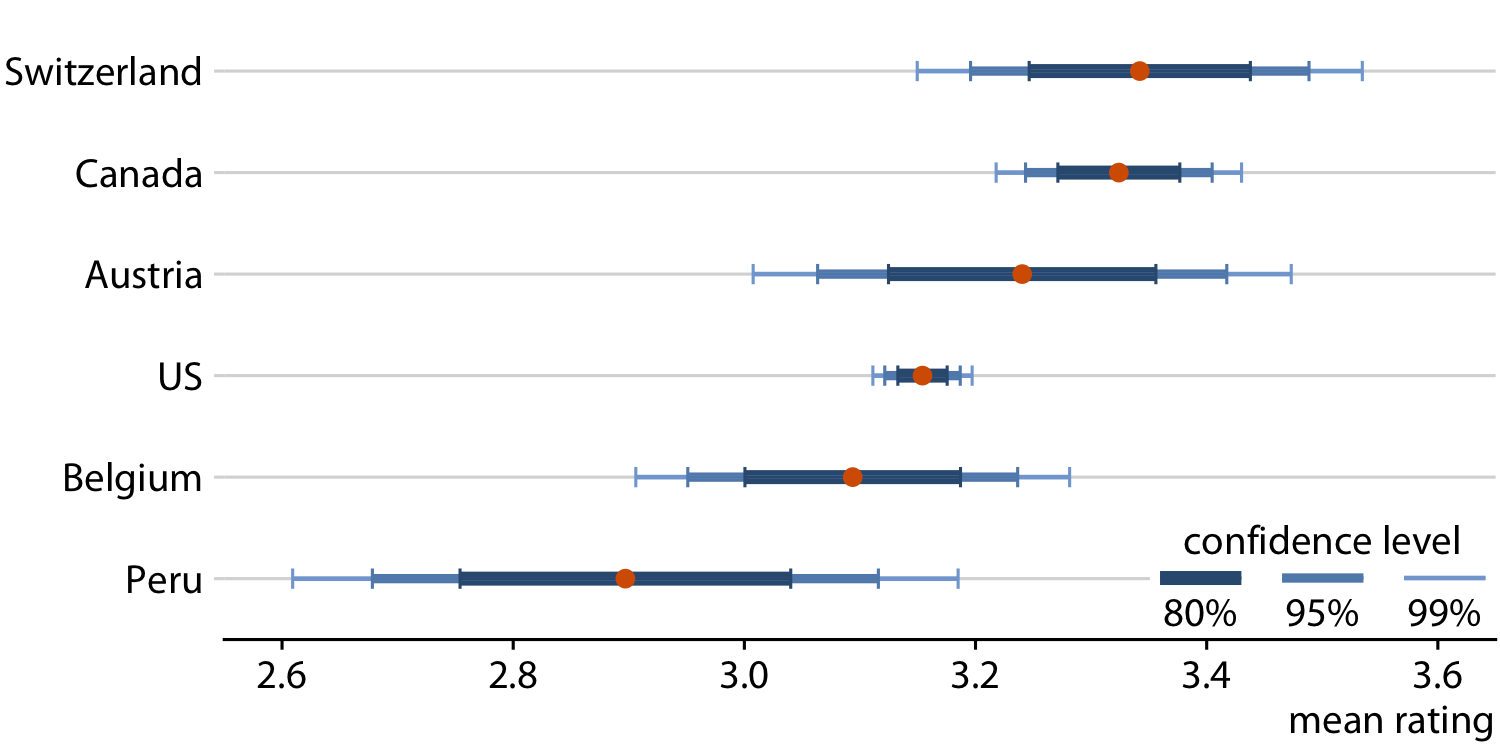!

**Discussion** Looking at above plot, what you can tell about the differences in mean ratings? 

The mean ratings of Canadian, Swiss, and Austrian bars are higher than the mean rating of US bars, but given the uncertainty in these mean ratings, are the differences in means significant? The word **“significant”** here is a technical term used by statisticians. We call a difference significant if with some level of confidence we can reject the assumption that the observed difference was caused by random sampling. Since only a finite number of Canadian and US bars were rated, the raters could have accidentally considered more of the better Canadian bars and fewer of the better US bars, and this random chance might look like a systematic rating advantage of Canadian over US bars.

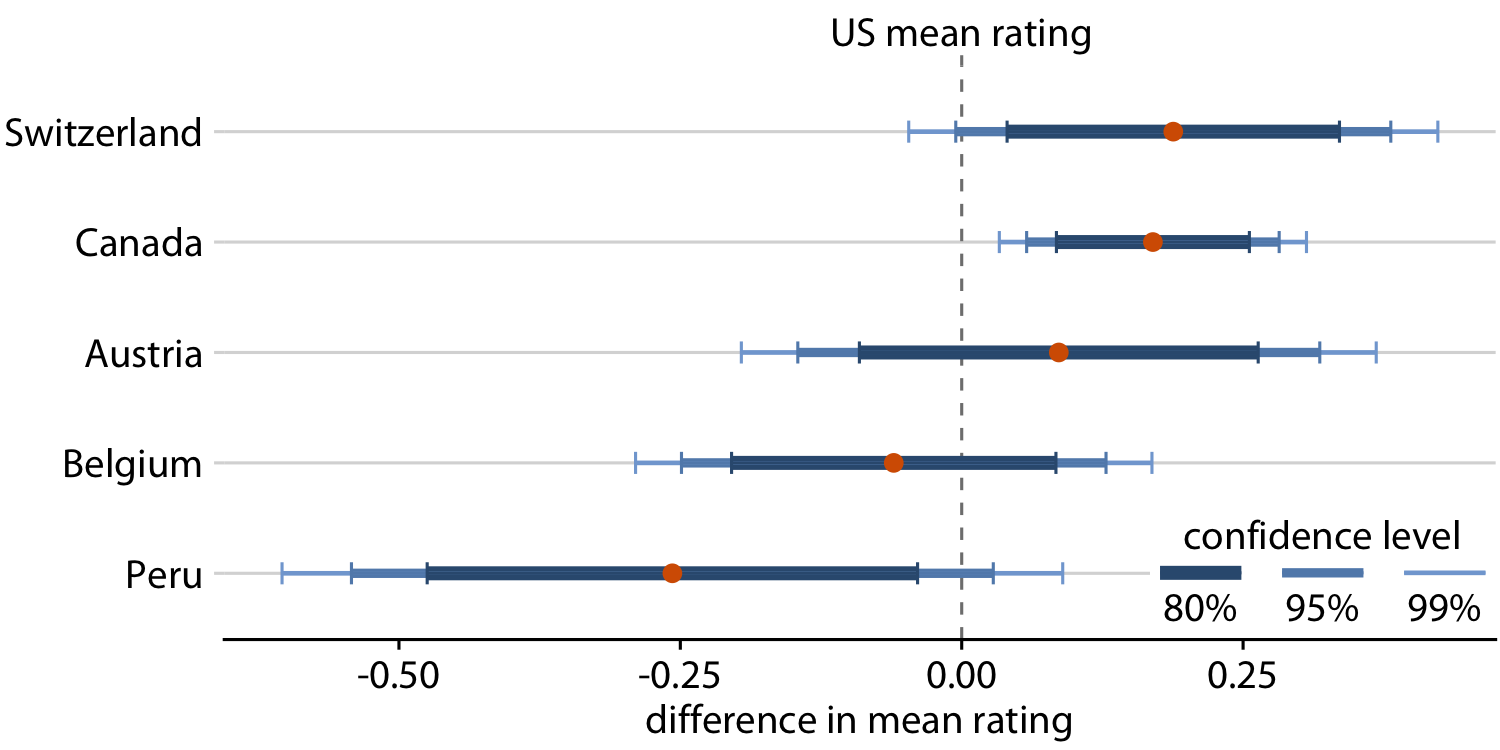!

We see that only bars from Canada are significantly higher-rated than bars from the US. For bars from Switzerland, the 95% confidence interval on the difference just barely includes the value zero. Thus, the difference between the mean ratings of US and Swiss chocolate bars is barely not significant at the 5% level. Finally, there is no evidence at all that Austrian bars have systematically higher mean ratings than US bars.

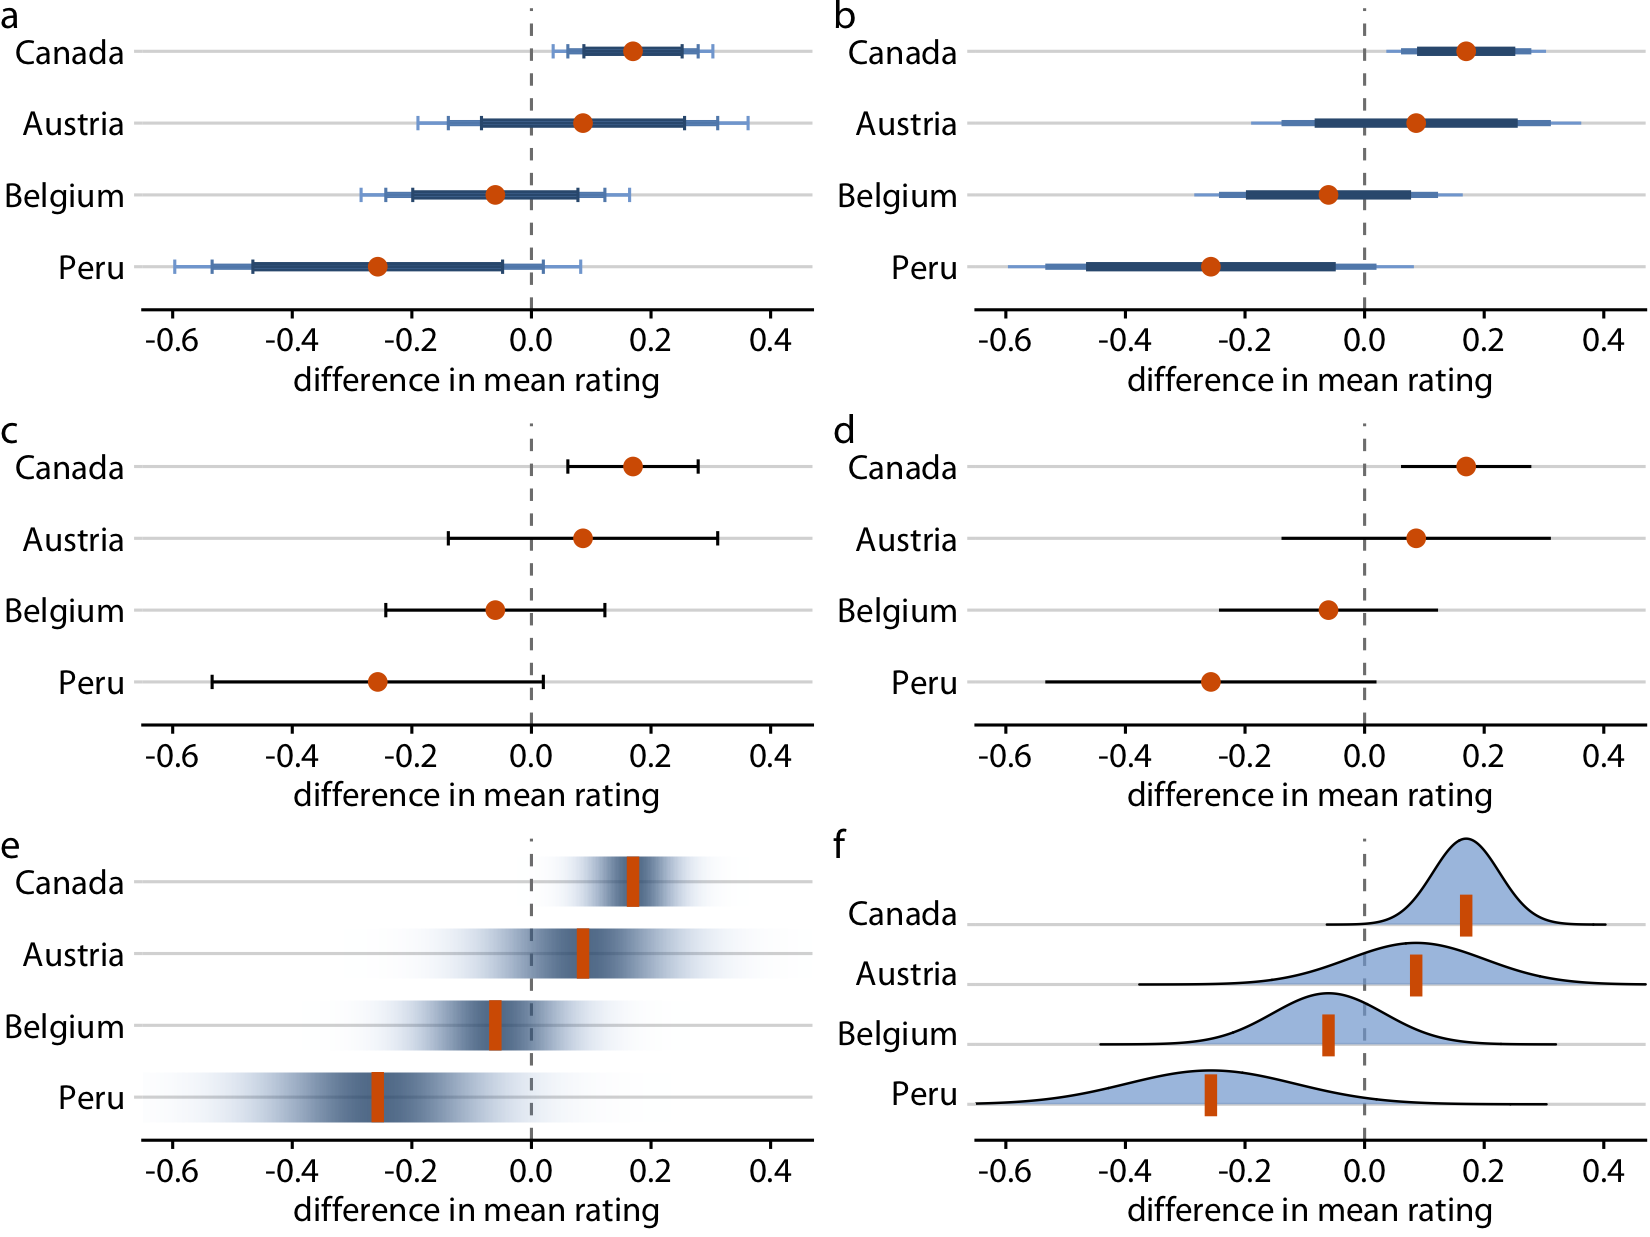!

As an alternative to error bars, we could draw confidence strips that gradually fade into nothing. Confidence strips better convey how probable different values are, but they are difficult to read. We would have to visually integrate the different shadings of color to determine where a specific confidence level ends. Similar problems arise when we show explicit confidence distributions. It is difficult to visually integrate the area under the curve and to determine where exactly a given confidence level is reached. 

For simple 2D figures, error bars have one important advantage over more complex displays of uncertainty: they can be combined with many other types of plots.

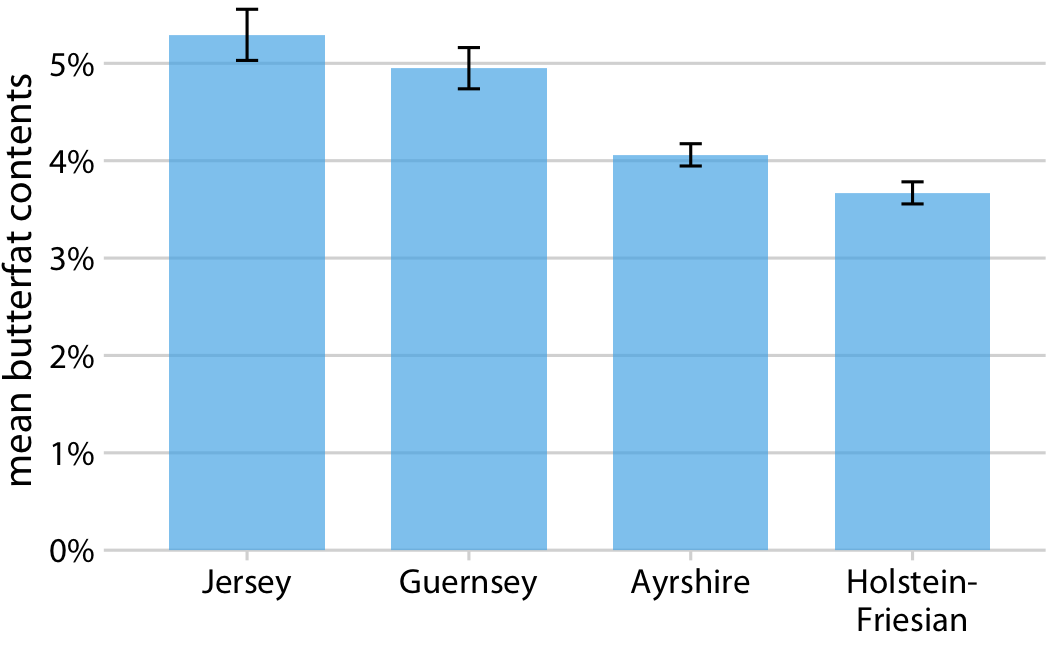![image.png]

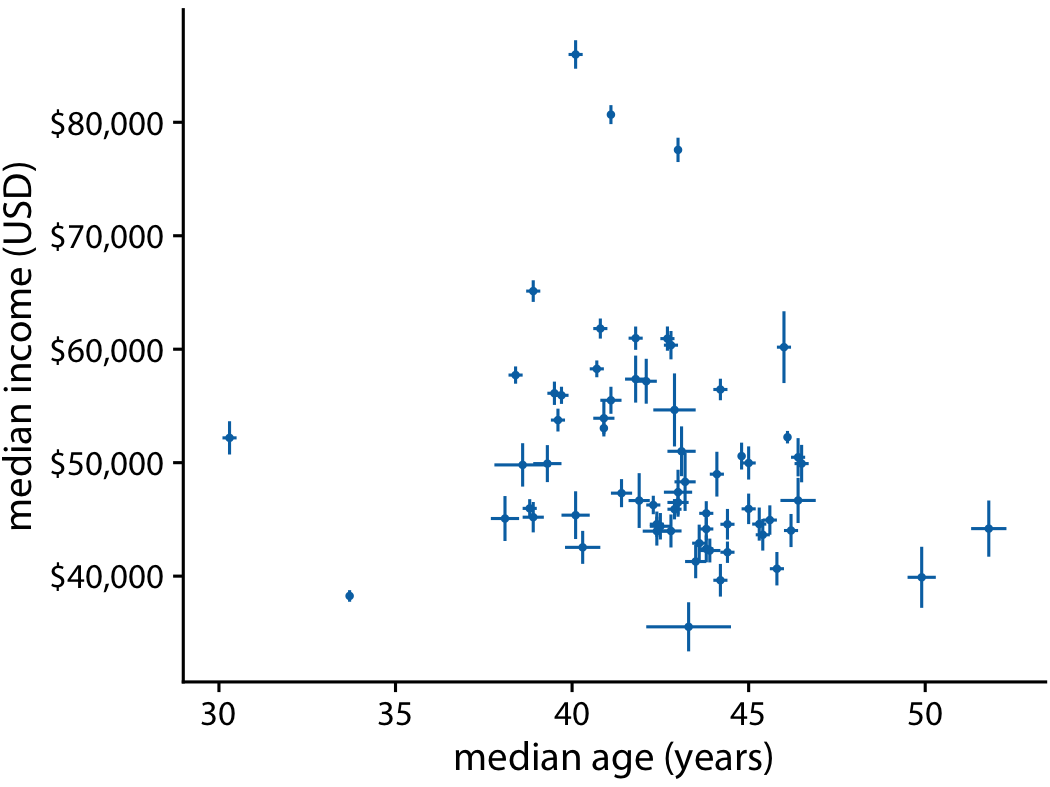!

## Visualizing the Uncertainty of Curve Fits

We discused in last lecture that trend estimates also have uncertainty, and it is customary to show the uncertainty in a trend line with a confidence band. The confidence band provides us with a range of different fit lines that would be compatible with the data. 

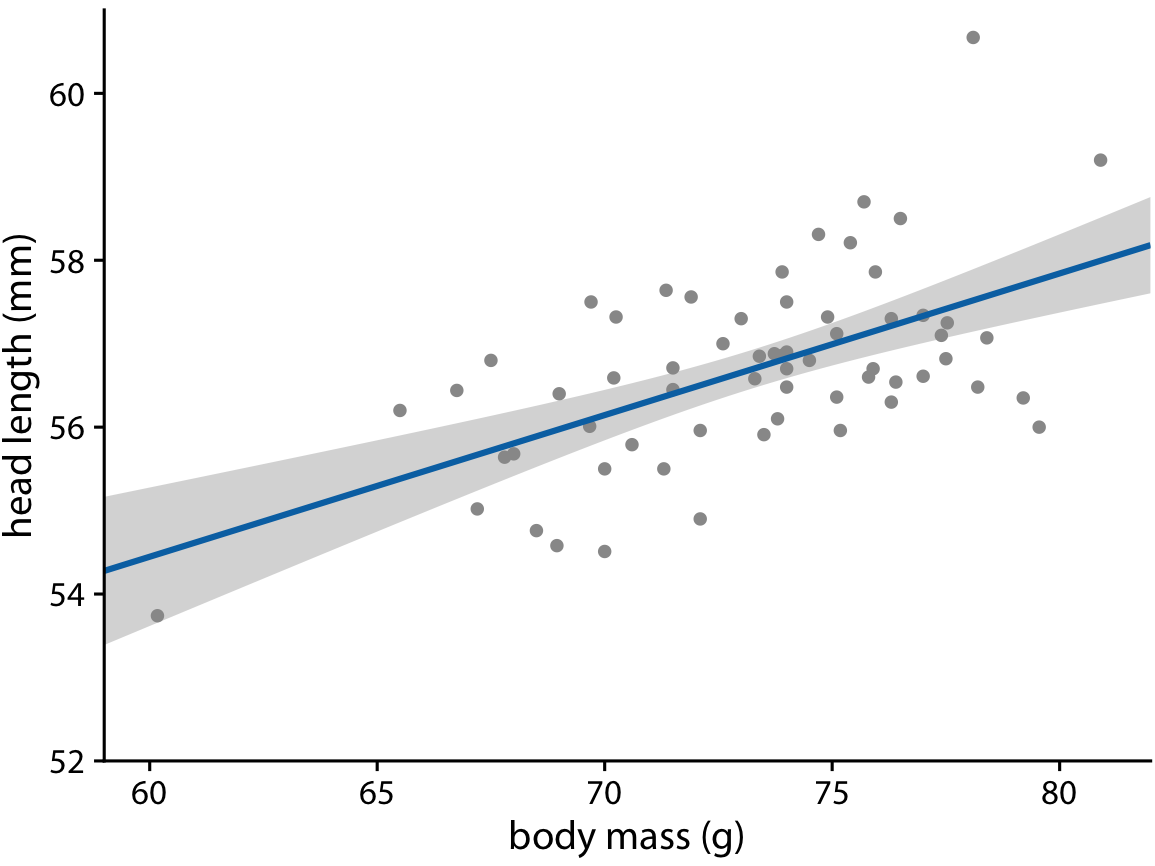!

it can be useful to highlight different levels of confidence. This leads us to the graded confidence band, which shows several confidence levels at once

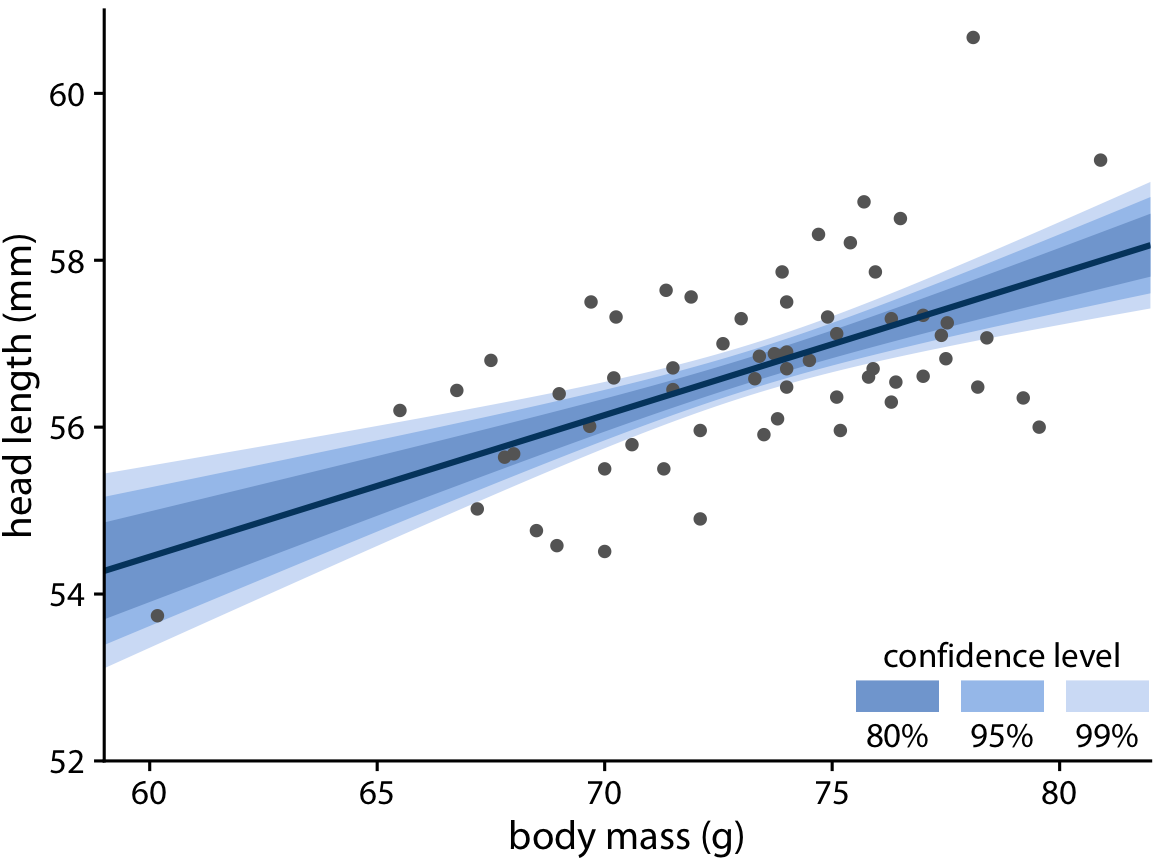!

We can also draw confidence bands for nonlinear curve fits. Such confidence bands look nice but can be difficult to interpret

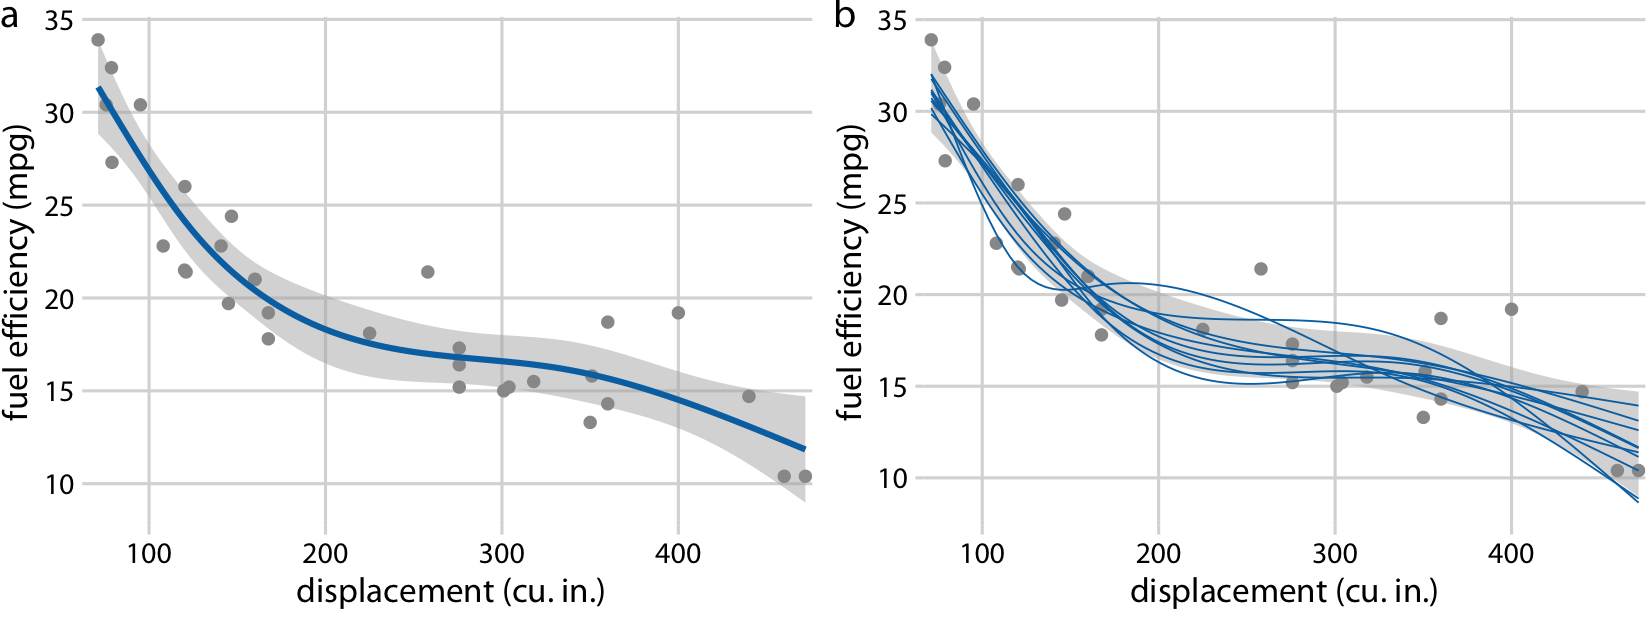!

**Discussion:** The method we choose to represent the visualization depend on who is our audience. Why?

Let 's do some practice on real data

### Basic confidence intervals
for this lecture, we look into [Avacado price dataset](https://www.kaggle.com/datasets/neuromusic/avocado-prices)

In [94]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as sp
import seaborn as sns
plt.rcParams['figure.figsize'] = [10,8]
plt.style.use('seaborn-v0_8-whitegrid')

In [95]:
avocado = pd.read_csv("avocado.csv", parse_dates= True, index_col= 0)
avocado['Date'] = pd.to_datetime(avocado['Date'])

In [96]:
avocado.head()

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [97]:
avocado_prices = avocado[['type', 'AveragePrice']]

In [98]:
avocado_prices.head()

,type,AveragePrice
0,conventional,1.33
1,conventional,1.35
2,conventional,0.93
3,conventional,1.08
4,conventional,1.28


In [99]:
avocado_prices = avocado_prices.groupby("type").agg([np.mean, np.std, sp.sem])["AveragePrice"]

In [100]:
avocado_prices.head()

,mean,std,sem
type,,,
conventional,1.158040,0.263041,0.002753
organic,1.653999,0.363502,0.003806


In [101]:
avocado_prices['double_std']= avocado_prices['std']*2

In [102]:
avocado_prices['CI_95']= avocado_prices['sem']*1.96
avocado_prices['CI_99']= avocado_prices['sem']*2.57
avocado_prices['CI_99.9']= avocado_prices['sem']*3.29

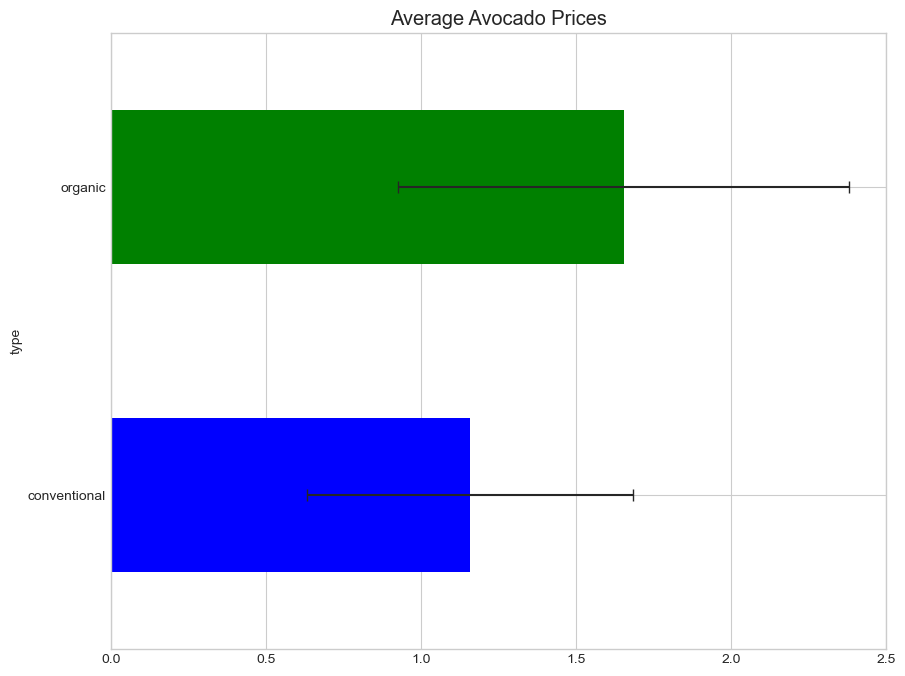

In [103]:
#error bar within pandas
avocado_prices.plot(kind = "barh", y = "mean", legend = False, xerr = 'double_std',capsize = 4, color =['b','g'], title = "Average Avocado Prices");

Do you think the average price of avacado is **Significantly** different for conventional and organic ones?

In [106]:
len(avocado)

18249

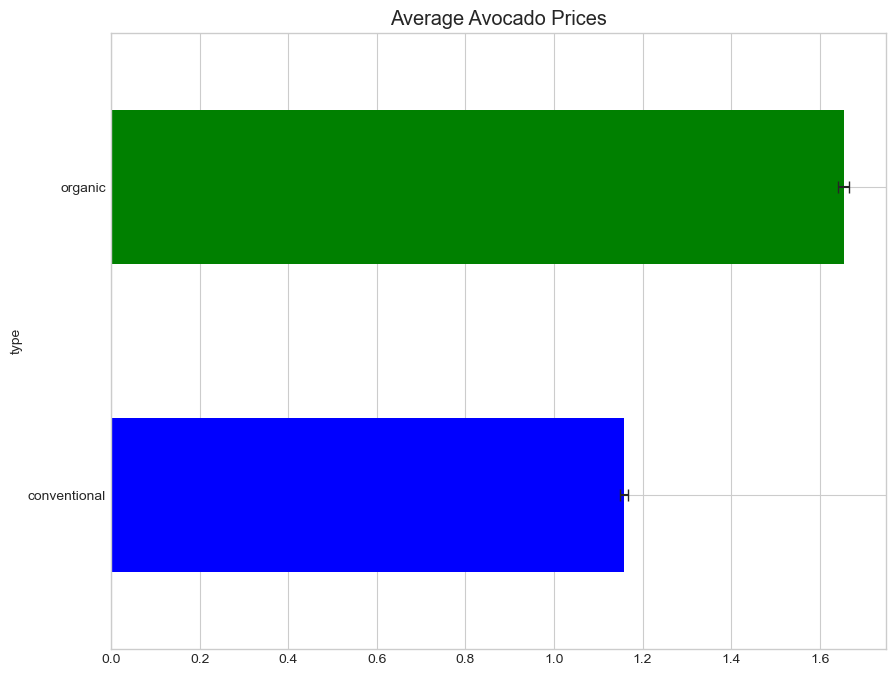

In [108]:
avocado_prices.plot(kind = "barh", y = "mean", legend = False, xerr = 'CI_99.9',capsize = 4, color =['b','g'], title = "Average Avocado Prices");

Why the error bar is small?

You can easily implement the above plot using seaborn for different [error measures](https://seaborn.pydata.org/tutorial/error_bars.html)

<Axes: xlabel='AveragePrice', ylabel='type'>

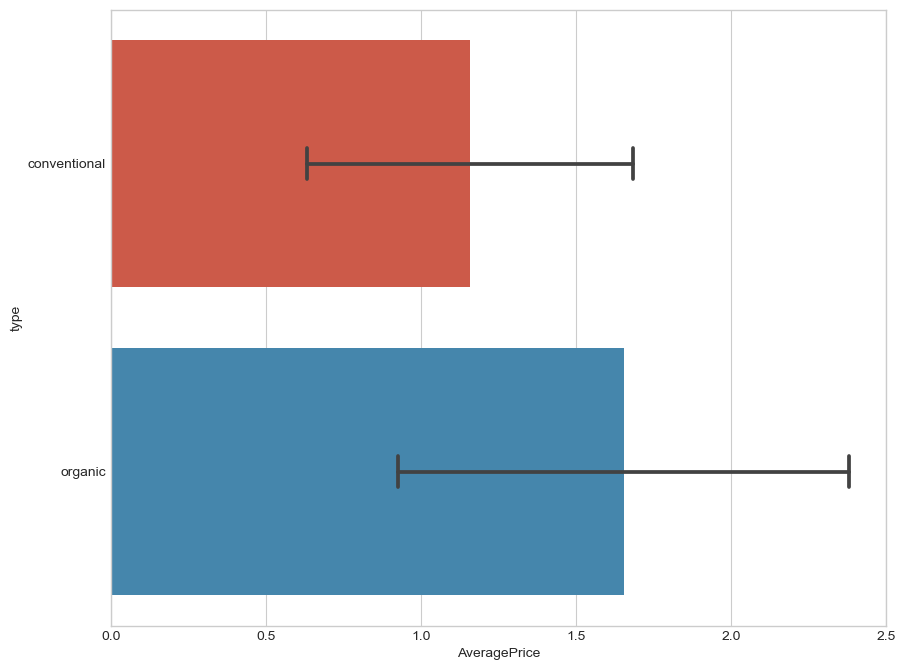

In [109]:
#error bar within seaborn
sns.barplot(x= "AveragePrice", y="type", data=avocado, estimator=np.mean, errorbar=('sd', 2), capsize=.1)

<Axes: xlabel='AveragePrice', ylabel='type'>

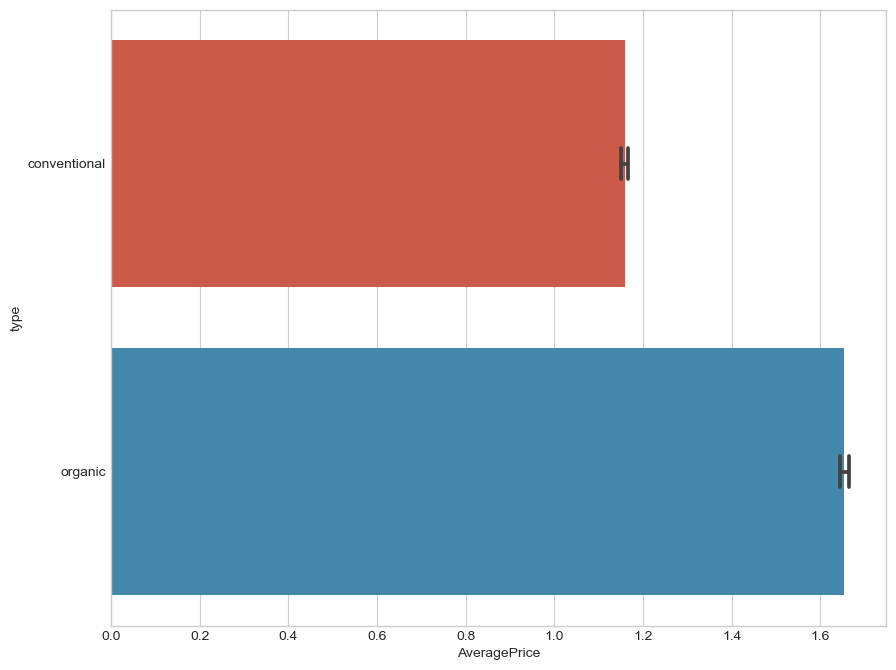

In [40]:
sns.barplot(x= "AveragePrice", y="type", data=avocado, estimator=np.mean, errorbar=('ci', 99.9), capsize=.1)

In [110]:
price_year = avocado[['year', 'AveragePrice']]
avocado_year = price_year.groupby("year").agg([np.mean, np.std, sp.sem])["AveragePrice"]
avocado_year['double_std']= avocado_year['std']*2
avocado_year['CI_95']= avocado_year['sem']*1.96
avocado_year['CI_99']= avocado_year['sem']*2.57
avocado_year['CI_80']= avocado_year['sem']*1.28

In [111]:
avocado_year.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4 entries, 2015 to 2018
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   mean        4 non-null      float64
 1   std         4 non-null      float64
 2   sem         4 non-null      float64
 3   double_std  4 non-null      float64
 4   CI_95       4 non-null      float64
 5   CI_99       4 non-null      float64
 6   CI_80       4 non-null      float64
dtypes: float64(7)
memory usage: 256.0 bytes


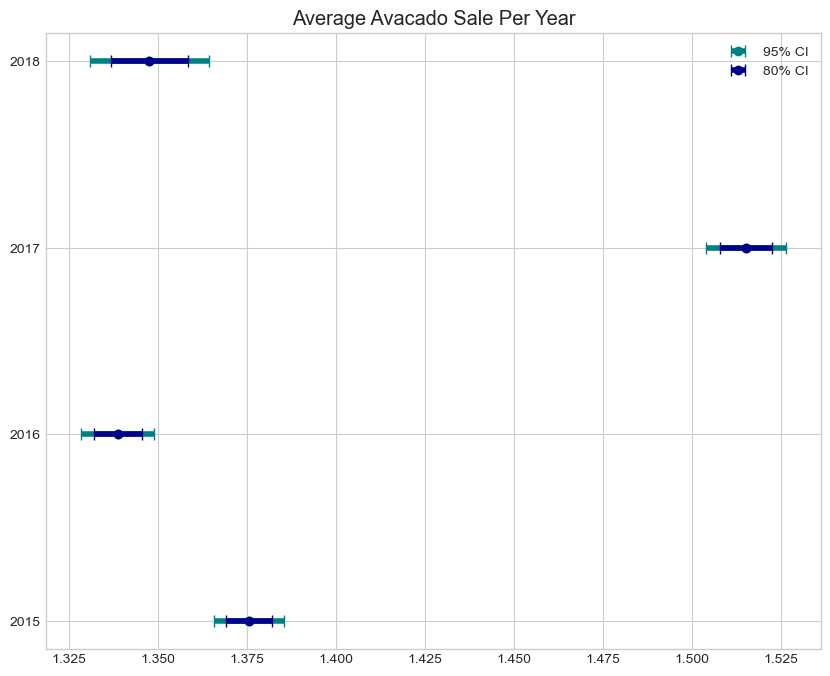

In [61]:
plt.errorbar(avocado_year['mean'], avocado_year.index, xerr=avocado_year['CI_95'], fmt='o', capsize=4 , color= 'teal', label= '95% CI', linewidth= 4 )
plt.errorbar(avocado_year['mean'], avocado_year.index, xerr=avocado_year['CI_80'], fmt='o', capsize=4, color= 'darkblue', label= '80% CI', linewidth= 4)
plt.title('Average Avacado Sale Per Year')
plt.legend()
plt.yticks(ticks=[2015, 2016, 2017, 2018])
plt.show()

What happened in 2017?

https://globaledge.msu.edu/blog/post/53425/2017-sees-a-shocking-increase-in-avocado

<Axes: xlabel='year', ylabel='AveragePrice'>

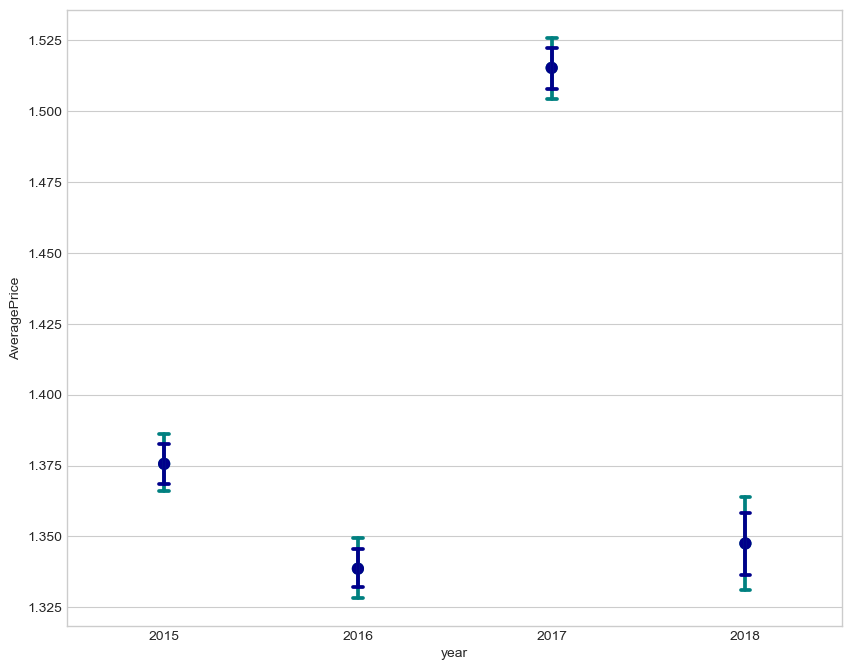

In [113]:
sns.pointplot(x="year",y= "AveragePrice", data=avocado, estimator=np.mean, errorbar=('ci', 95), capsize=.05, join=False, color= 'teal', label= '95% CI')
sns.pointplot(x="year",y= "AveragePrice", data=avocado, estimator=np.mean, errorbar=('ci', 80), capsize=.05, join=False, color= 'darkblue', label= '95% CI')

<Axes: xlabel='year', ylabel='AveragePrice'>

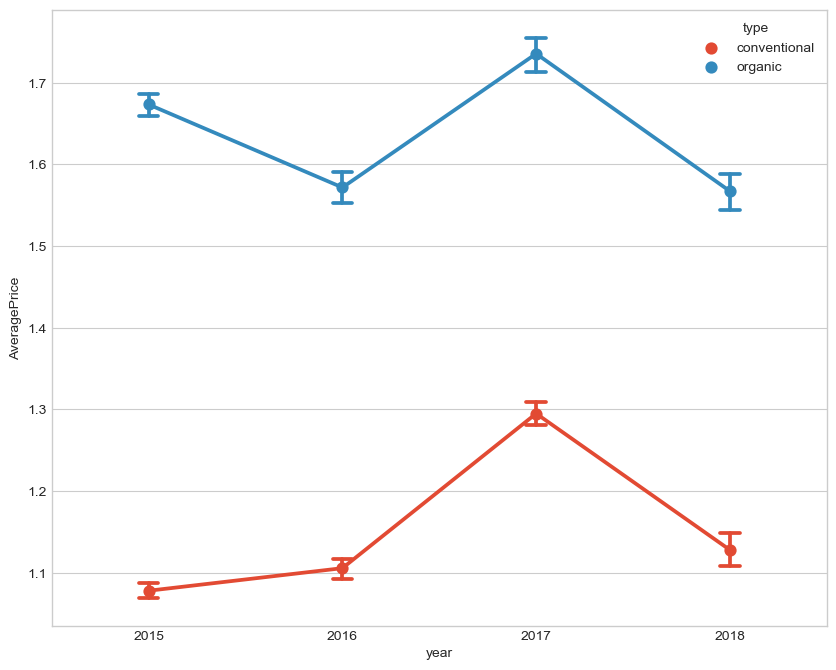

In [114]:
sns.pointplot(x="year",y= "AveragePrice", data=avocado, hue= 'type', estimator=np.mean, errorbar=('ci', 99), capsize=.1, join=True)

In [115]:
# load the dataset
tip_df = sns.load_dataset('tips')
tip_df['tip_percent']= round(tip_df['tip']/tip_df['total_bill']*100,0)

In [116]:
tip_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   total_bill   244 non-null    float64 
 1   tip          244 non-null    float64 
 2   sex          244 non-null    category
 3   smoker       244 non-null    category
 4   day          244 non-null    category
 5   time         244 non-null    category
 6   size         244 non-null    int64   
 7   tip_percent  244 non-null    float64 
dtypes: category(4), float64(3), int64(1)
memory usage: 9.3 KB


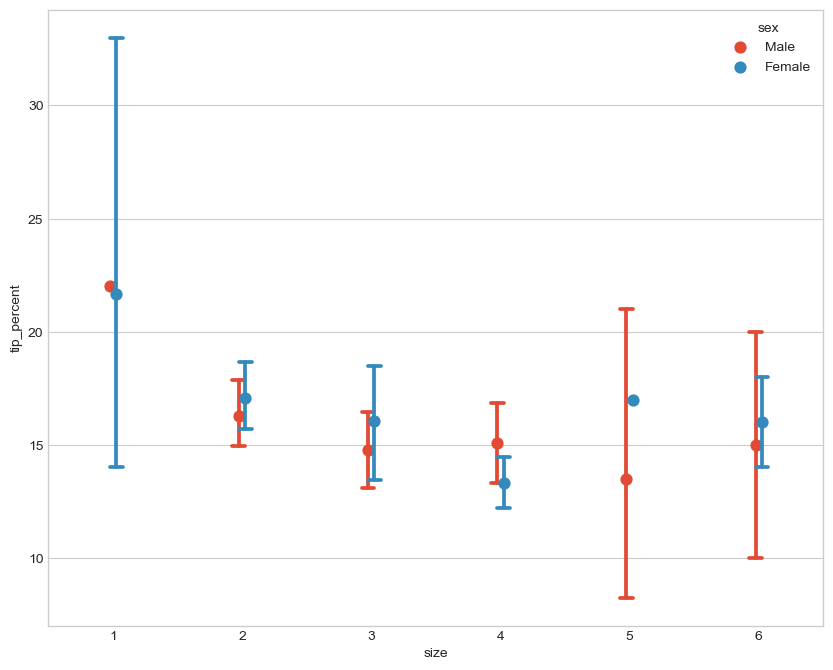

In [118]:
sns.pointplot(x="size",y= "tip_percent", data=tip_df, hue= 'sex', estimator=np.mean, errorbar=('ci', 95), capsize=.1, join=False, dodge= True);


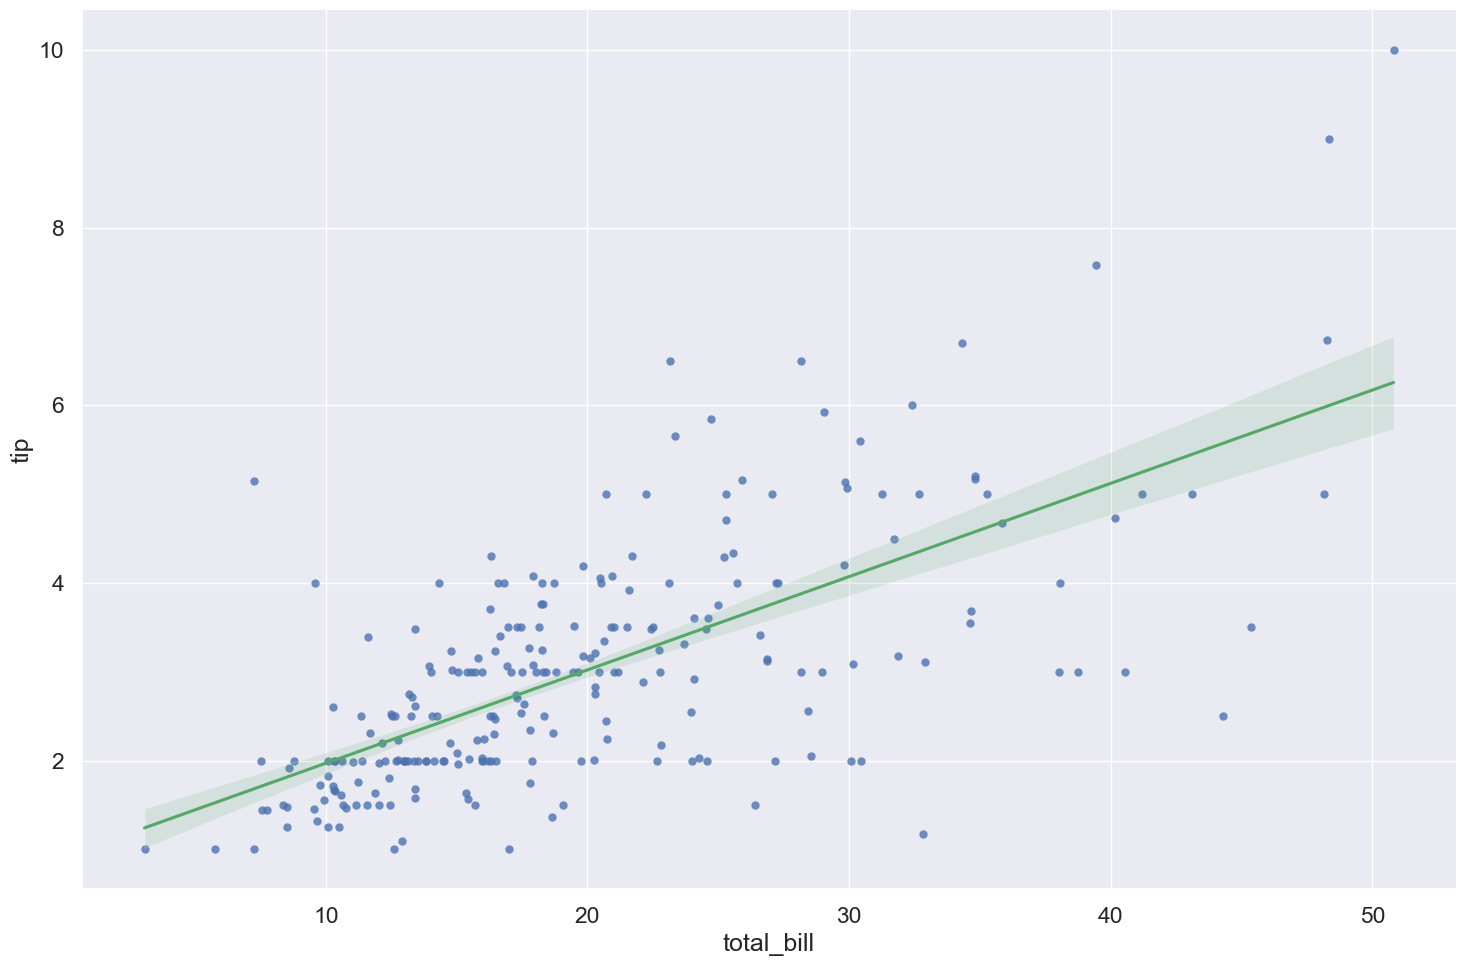

In [245]:
sns.set(font_scale=1.5)
sns.lmplot(x ='total_bill', y ='tip', data = tip_df, height= 10, aspect= 1.5, line_kws={'color': 'g'}, ci=80);

In [76]:
import plotly.express as px
gm = px.data.gapminder()

In [79]:
gm['year'].nunique()

12

In [80]:
gm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1704 entries, 0 to 1703
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   country    1704 non-null   object 
 1   continent  1704 non-null   object 
 2   year       1704 non-null   int64  
 3   lifeExp    1704 non-null   float64
 4   pop        1704 non-null   int64  
 5   gdpPercap  1704 non-null   float64
 6   iso_alpha  1704 non-null   object 
 7   iso_num    1704 non-null   int64  
dtypes: float64(2), int64(3), object(3)
memory usage: 106.6+ KB


### In-class activity
group_by the gapminder dataset by year, show the 95% confidence intervals for gdp per capita
